In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
np.random.seed(123)

In [58]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [19]:
train = train.dropna(how='any',axis=0) 

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3347 entries, 0 to 4176
Columns: 363 entries, id to feature_59_type5
dtypes: float64(361), int64(1), object(1)
memory usage: 9.3+ MB


In [32]:
train.head()

,id,span,target,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,...,feature_50_type5,feature_51_type5,feature_52_type5,feature_53_type5,feature_54_type5,feature_55_type5,feature_56_type5,feature_57_type5,feature_58_type5,feature_59_type5
0,M00yaXQwMVJ1R1Q0RHFBVVR5BHyNyIeEd7yqxidFW7U=,17,1.025179,1.455438,0.767232,1.103207,0.355392,0.144054,1.249518,0.301203,...,-1.395021,-1.222626,-0.139682,0.813436,-0.340162,-0.032112,1.740059,1.000138,-1.667038,-0.128554
1,M01HU2pzN1dZNnVOYmhjayLgjCmIG1AyHvfRsZv+IV4=,23,0.996383,0.132304,1.724691,1.517504,0.884100,-0.897716,-0.122241,1.523423,...,-1.269116,0.477700,1.590249,0.166410,0.648515,0.128202,-1.853485,-0.185335,-0.933777,0.420162
2,M01la1Znd0ROMUU5UGJvdc5EJqBI/dj9r8C86lWkehA=,29,1.006573,0.542726,0.844240,-0.089719,0.204441,0.300044,0.564788,0.976612,...,0.551799,1.066635,0.126409,-1.462542,1.177361,-1.142417,-0.506686,-0.741696,0.565734,-1.304175
3,M052cFV0RUdYT3FRMU1Kab7l27PQanylu/gYY6UjtK0=,16,0.968543,0.253863,0.799112,-1.399473,-1.979899,0.086771,-1.214792,-0.423301,...,0.741387,-0.838532,-0.137156,0.075079,-1.395079,2.381879,-0.934174,0.775545,1.014650,1.978815
4,M0FFZm51b3d2a2xZOWFRWEkjj3iGrBdIeJj7omGlFz0=,4,1.006677,-0.262913,0.091079,0.799063,0.998184,-0.804963,-1.468698,-0.041668,...,1.197475,1.162764,-0.773935,-0.962255,0.161526,-0.722540,0.490989,-1.036087,1.361248,-0.548412


In [33]:
data = train.drop("id",axis=1)

In [34]:
data.head()

,span,target,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_50_type5,feature_51_type5,feature_52_type5,feature_53_type5,feature_54_type5,feature_55_type5,feature_56_type5,feature_57_type5,feature_58_type5,feature_59_type5
0,17,1.025179,1.455438,0.767232,1.103207,0.355392,0.144054,1.249518,0.301203,-1.470791,...,-1.395021,-1.222626,-0.139682,0.813436,-0.340162,-0.032112,1.740059,1.000138,-1.667038,-0.128554
1,23,0.996383,0.132304,1.724691,1.517504,0.884100,-0.897716,-0.122241,1.523423,-1.152261,...,-1.269116,0.477700,1.590249,0.166410,0.648515,0.128202,-1.853485,-0.185335,-0.933777,0.420162
2,29,1.006573,0.542726,0.844240,-0.089719,0.204441,0.300044,0.564788,0.976612,0.513310,...,0.551799,1.066635,0.126409,-1.462542,1.177361,-1.142417,-0.506686,-0.741696,0.565734,-1.304175
3,16,0.968543,0.253863,0.799112,-1.399473,-1.979899,0.086771,-1.214792,-0.423301,1.159680,...,0.741387,-0.838532,-0.137156,0.075079,-1.395079,2.381879,-0.934174,0.775545,1.014650,1.978815
4,4,1.006677,-0.262913,0.091079,0.799063,0.998184,-0.804963,-1.468698,-0.041668,0.533569,...,1.197475,1.162764,-0.773935,-0.962255,0.161526,-0.722540,0.490989,-1.036087,1.361248,-0.548412


In [35]:
corr=data.corr()

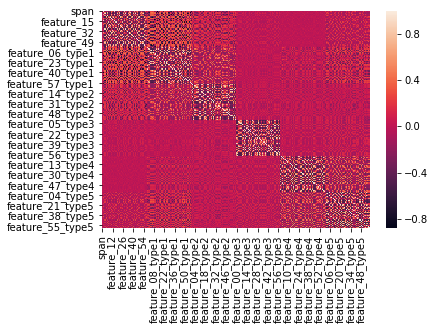

In [36]:
sns.heatmap(corr)

In [37]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3347 entries, 0 to 4176
Columns: 250 entries, span to feature_59_type5
dtypes: float64(249), int64(1)
memory usage: 6.4 MB


In [40]:
selected_columns = selected_columns[1:].values

In [41]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [42]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [43]:
result = pd.DataFrame()
result['target'] = data['target']

In [44]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [140]:
data = data.drop(['target'],axis = 1)


In [143]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [144]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [145]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
type(x_test)

numpy.ndarray

In [147]:
y_pred = regressor.predict(x_test)

In [148]:
print(regressor.intercept_)
print(regressor.coef_)

[0.99980184]
[[ 6.79487689e-04  1.13300225e-03 -3.71970054e-04 -3.69468422e-04
   2.98919620e-03  3.31553856e-04  1.39211946e-04  9.00711631e-05
  -1.91529469e-03 -6.15114210e-04  1.09635777e-04  5.09051078e-04
   2.90525842e-03 -2.28577765e-04  1.42851123e-03  2.17515253e-03
  -3.36596742e-04  1.35159832e-04 -2.21582721e-03  1.77212927e-04
   1.08784186e-03  1.69470032e-05 -3.78053940e-04 -4.31629496e-04
   3.60632832e-05  1.08075841e-03  1.20988765e-03 -1.48971584e-04
  -1.61959876e-03  2.08260155e-03  1.79604154e-05  5.70446220e-04
   6.45869337e-05 -1.26684305e-04 -1.61830335e-03  1.81872111e-03
   1.94083216e-03  5.82555000e-04 -1.02046271e-03 -7.08154822e-04
   7.42124739e-04 -8.32447361e-04  2.62111113e-04 -5.56090480e-04
  -1.65967668e-03  5.48656396e-04  1.49091940e-03  1.84544975e-04]]


In [149]:
print(x_test.shape)

(670, 48)


In [150]:
type(x_test)


numpy.ndarray

In [151]:
from sklearn import metrics

In [152]:
print(metrics.mean_absolute_error(y_test, y_pred))

0.016000989509017766


In [153]:
l = list(data.columns)


In [154]:
type(l)

list

In [158]:
l.remove('target')

ValueError: list.remove(x): x not in list

In [159]:
#Getting the same columns in train dataframe

In [160]:
test_modified = test[l]
test_modified.columns

Index(['feature_03', 'feature_04', 'feature_07', 'feature_12', 'feature_21',
       'feature_24', 'feature_27', 'feature_34', 'feature_46', 'feature_49',
       'feature_52', 'feature_00_type1', 'feature_02_type1',
       'feature_10_type1', 'feature_15_type1', 'feature_19_type1',
       'feature_20_type1', 'feature_22_type1', 'feature_35_type1',
       'feature_40_type1', 'feature_44_type1', 'feature_51_type1',
       'feature_01_type2', 'feature_10_type2', 'feature_14_type2',
       'feature_38_type2', 'feature_00_type3', 'feature_04_type3',
       'feature_12_type3', 'feature_13_type3', 'feature_16_type3',
       'feature_27_type3', 'feature_08_type4', 'feature_11_type4',
       'feature_14_type4', 'feature_26_type4', 'feature_39_type4',
       'feature_41_type4', 'feature_00_type5', 'feature_01_type5',
       'feature_03_type5', 'feature_05_type5', 'feature_09_type5',
       'feature_10_type5', 'feature_15_type5', 'feature_17_type5',
       'feature_34_type5', 'feature_35_type5'],


In [161]:
test_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
feature_03          1000 non-null float64
feature_04          1000 non-null float64
feature_07          1000 non-null float64
feature_12          1000 non-null float64
feature_21          1000 non-null float64
feature_24          1000 non-null float64
feature_27          1000 non-null float64
feature_34          1000 non-null float64
feature_46          1000 non-null float64
feature_49          1000 non-null float64
feature_52          1000 non-null float64
feature_00_type1    1000 non-null float64
feature_02_type1    1000 non-null float64
feature_10_type1    1000 non-null float64
feature_15_type1    1000 non-null float64
feature_19_type1    1000 non-null float64
feature_20_type1    1000 non-null float64
feature_22_type1    1000 non-null float64
feature_35_type1    1000 non-null float64
feature_40_type1    1000 non-null float64
feature_44_type1    1000 non-null float64
feature_51_t

In [167]:
test_pred = regressor.predict(imputed_df)

In [ ]:
#checking for null values

In [164]:
test_modified.isna().sum()

feature_03           0
feature_04           0
feature_07           0
feature_12           0
feature_21           0
feature_24           0
feature_27           0
feature_34           0
feature_46           0
feature_49           0
feature_52           0
feature_00_type1     0
feature_02_type1     0
feature_10_type1     0
feature_15_type1     0
feature_19_type1     0
feature_20_type1     0
feature_22_type1     0
feature_35_type1     0
feature_40_type1     0
feature_44_type1     0
feature_51_type1     0
feature_01_type2     0
feature_10_type2     0
feature_14_type2     0
feature_38_type2     0
feature_00_type3    35
feature_04_type3    35
feature_12_type3    35
feature_13_type3    35
feature_16_type3    35
feature_27_type3    35
feature_08_type4    36
feature_11_type4    36
feature_14_type4    36
feature_26_type4    36
feature_39_type4    36
feature_41_type4    36
feature_00_type5    63
feature_01_type5    63
feature_03_type5    63
feature_05_type5    63
feature_09_type5    63
feature_10_

In [162]:
mean_imputer = Imputer(missing_values = 'NaN',strategy = 'mean',axis = 1)
mean_imputer = mean_imputer.fit(test_modified)
imputed_df = mean_imputer.transform(test_modified.values)

In [163]:
imputed_df

array([[ 0.82223821, -0.70478907, -1.34387827, ..., -1.15821315,
        -1.26175311,  1.38372955],
       [-1.86735101,  1.32673181,  0.35810018, ...,  0.08676933,
         1.05880886, -2.1018874 ],
       [ 1.52424363, -0.41198149, -0.05788585, ..., -0.15081448,
         0.06455959,  1.27406501],
       ...,
       [-1.53033361,  0.843261  , -0.16478412, ..., -0.18329829,
         0.26794135, -2.63953205],
       [ 1.45617908, -0.85057757, -1.07302817, ..., -1.0522599 ,
        -0.67139429,  1.57302579],
       [ 2.18839111, -0.95240942, -0.62232528, ...,  1.34574787,
         1.4736892 , -1.41772693]])

In [116]:
test_modified = test_modified.apply(lambda x : x.fillna(x.mean()),axis = 1)

In [166]:
test_modified.shape

(1000, 48)

In [165]:
imputed_df.shape

(1000, 48)

In [172]:
res = pd.DataFrame(test_pred)

In [174]:
res['ID'] = test['id']

In [188]:
res = res.drop([0],axis = 1)

In [179]:
res = res[['ID',0]]
res['Target'] = res[0]

In [189]:
res.to_csv('output.csv')

In [185]:
output.csv

NameError: name 'output' is not defined